<a id="tableofcontents"></a>
# Table of Contents
- **Data client** 
    - [Connect to synapse](#synapseconnect)
- **Subchallenge 1**
    - [Sub Challenge 1 Data](#s1data)
    - [Comparing Missing vs. Non-missing values](#missingornot)
    - [Additional Analytics](#morecounts)
    - [Imputation with FancyImpute](#fancy_impute)
    - [Two Component Gaussian Mixture Model](#2modegmm)

<a id="synapseconnect"></a>
## Connect to Synapse

In [1]:
import synapseclient
import synapseutils
import os
import configparser

config_path = os.path.join(os.environ['HOME'], '.synapseConfig')
cfg = configparser.ConfigParser()
cfg.read(config_path)
syn_usr = cfg.get("authentication", "username")
syn_pwd = cfg.get("authentication", "password")
syn = synapseclient.login(email=syn_usr, password=syn_pwd, rememberMe=True)

Welcome, Joy Rimchala!



<a id="s1data"></a>
# Sub Challenge 1 Data
Note we need to accept term of use on Synapse before the data can be downloaded.

back to the [table of contents](#tableofcontents)

In [2]:
import numpy as np
import pandas as pd
from collections import OrderedDict
sub1_synapse_id = 'syn10139511'
if 'files' not in locals():
    files = synapseutils.syncFromSynapse(syn, sub1_synapse_id)

data_dict = OrderedDict()
for fl in files:
    data_dict[fl.name] = pd.read_csv(fl.path, sep='\t')


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!

In [245]:
ground_truth['Gene_ID'].values

array(['Protein_1', 'Protein_2', 'Protein_3', ..., 'Protein_7925',
       'Protein_7926', 'Protein_7927'], dtype=object)

In [246]:
# For each Protein, what's the distribution of missing vs. non-missing values compared to truth
# Collect missing data stats across samples
missing = OrderedDict()
not_missing = OrderedDict()
ground_truth = data_dict['data_true.txt']
sample_cols = ground_truth.set_index('Gene_ID').columns
gene_list = ground_truth['Gene_ID'].values

for g in gene_list: 
    gtruth = ground_truth[ground_truth['Gene_ID']==g][sample_cols].values[0]
    for ds, obs in [(k, v) for (k, v) in data_dict.items() if not k.endswith('_true.txt')]:
        gobs = obs[obs['Gene_ID']==g][sample_cols].values[0]
        missing[ds, g] = gtruth[pd.isnull(gobs)]
        not_missing[ds, g] = gtruth[pd.notnull(gobs)]

        if g.endswith("500") & ds.endswith("9.txt"): 
            print("obs {}: gene: {}".format(ds, g))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<a id="missingornot"></a>
## Comparing missing vs. non-missing values distributions
- [Aggregating values across samples by proteins](#byprotein)
- [Aggregating values across proteins by samples](#bysample)

back to the [table of contents](#tableofcontents)

In [ ]:
# Utility functions
def _dim_dict():
    return {'sample':0, 'protein':1}    
    
def missing_categories_slice(missing, not_missing, _id, dim):
    # keys in missing dict is a tuple (sample_id, protein_id)
    all_samples_missing = []
    all_samples_not_missing = []
    for a in filter(lambda x: x[_dim_dict()[dim]] == _id, missing.keys()): 
        all_samples_missing.extend(missing[a])
        all_samples_not_missing.extend(not_missing[a])

    return all_samples_missing, all_samples_not_missing


def plot_histogram_missing_slice(all_samples_missing, all_samples_not_missing, _id, bin_missing=50, bin_not_missing=50):
    % pylab inline
    import seaborn as sns
    sns.set_style('white')
    sns.set_palette("hls", 4)

    fig, ax = plt.subplots(figsize=(5,4))
    alpha = 0.70
    ftsize = 20
    ax.hist(all_samples_not_missing, alpha=alpha, bins=bin_not_missing)
    ax.hist(all_samples_missing, alpha=alpha, bins=bin_missing)
    ax.grid('on')
    ax.set_title(_id, fontsize=ftsize)
    ax.set_xlabel('Protein level', fontsize=round(0.8*ftsize))
    ax.set_ylabel('number of samples', fontsize=round(0.8*ftsize))
    ax.legend(['not_missing', 'missing'], fontsize=round(0.7*ftsize))
    plt.show()

<a id="byprotein"></a>
### Aggregating values across samples by proteins

In [243]:
protein_ids = unique(list(map(lambda x: x[_dim_dict()['protein']], missing.keys())))
num_samples = 5
random_proteins = protein_ids[np.random.randint(low=0, high=len(protein_ids), size=num_samples)]

for _id in random_proteins:
    all_samples_missing, all_samples_not_missing = missing_categories_slice(missing, not_missing, _id=_id, dim='protein')
    plot_histogram_missing_slice(all_samples_missing, all_samples_not_missing, _id, bin_missing=50, bin_not_missing=20)
    plt.show()

NameError: name '_dim_dict' is not defined

<a id="bysample"></a>
### Aggregating values across proteins by samples

In [ ]:
dim='sample'
_ids = unique(list(map(lambda x: x[_dim_dict()[dim]], missing.keys())))
num_samples = 5
randoms = _ids[np.random.randint(low=0, high=len(_ids), size=num_samples)]

for _id in randoms:
    all_samples_missing, all_samples_not_missing = missing_categories_slice(missing, not_missing, _id=_id, dim=dim)
    plot_histogram_missing_slice(all_samples_missing, all_samples_not_missing, _id, bin_missing=50, bin_not_missing=100)
    plt.show()

<a id="morecounts"></a>
## Additional Analytics
- Total number of missing values
- Total number of observations
- Missing value ratio
- Number of missing proteins per samples
- Proportions of zeros (NMAR) vs non-zeros (MAR) per samples

back to the [table of contents](#tableofcontents)

In [ ]:
sample_cols = list(filter(lambda x: x.startswith('Sample'), data_dict['data_true.txt'].columns))
thres = 1
num_samples = 80
missing_counts_by_sample_by_protein = [
    (
        k[0], # observation id
        k[1], # protein id
        len(missing[k]), # total missing
        len([v for v in missing[k] if v >= thres]), # MAR
        len([v for v in missing[k] if v < thres])  # NMAR
    )
    for k in missing.keys()
]
missing_category = pd.DataFrame(missing_counts_by_sample_by_protein)
missing_category.columns = ['obs_id', 'Gene_ID', 'total_missing', 'MAR', 'NMAR']
missing_category['fraction_missing_total'] = missing_category['total_missing'].astype(float)/num_samples
missing_category['fraction_NMAR'] = missing_category['NMAR'].astype(float)/missing_category['total_missing']

not_missing_counts_by_sample_by_protein = [
    (
        k[0], # observation id
        k[1], # protein id
        len(not_missing[k]) # total not missing
    )
    for k in not_missing.keys()
]
not_missing_category = pd.DataFrame(not_missing_counts_by_sample_by_protein)
not_missing_category.columns = ['obs_id', 'Gene_ID', 'total_not_missing']
missing_category.to_csv('../data/missing_stats.csv', index=False)
not_missing_category.to_csv('../data/not_missing_stats.csv', index=False)

In [ ]:
total_number_of_missing_values = missing_category['total_missing'].sum()
num_samples = 80
total_observations = len(missing_category)*num_samples
print("Total Missing Values : {}".format(total_number_of_missing_values))
print("Total Number of Observations : {}".format(len(missing_category)*num_samples))
print("Global Percentage of Missing Values: %.2f " % (float(total_number_of_missing_values)/total_observations*100))

## Distribution of fraction Missing Values and NMARs by Sample by GeneID

In [ ]:
ax = missing_category['fraction_missing_total'].hist(bins=50, figsize=(6.4, 4.8))
ax.set_xlabel("Percent Missing")
ax.set_ylabel("Number of GeneID across all samples")
ax.set_title("Distribution of all missing values by Sample by GeneID")

mean_total_missing = missing_category['total_missing'].mean()
std_total_missing = missing_category['total_missing'].std()
CI95_total_missing = (
    mean_total_missing-1.96*std_total_missing, 
    mean_total_missing-1.96*std_total_missing
)

mean_percent_missing = missing_category['fraction_missing_total'].mean()*100
std_percent_missing = missing_category['fraction_missing_total'].std()*100
CI95_percent_missing = (
    mean_percent_missing-1.96*std_percent_missing, 
    mean_percent_missing+1.96*std_percent_missing
)

print("Average number of missing values : %.3f" % mean_total_missing)
print("Standard deviation of number of missing values : %.3f" % std_total_missing)
print("95% CI number of total missing:", CI95_total_missing)
print("Average percent of missing values : %.3f" % mean_percent_missing)
print("Standard deviation of percent missing values : %.3f" % std_percent_missing)
print("95% CI percent of total missing:", CI95_percent_missing)

In [ ]:
ax = missing_category['fraction_NMAR'].hist(bins=50, figsize=(6.4, 4.8))
ax.set_xlabel("Percent NMAR")
ax.set_ylabel("Number of GeneID across all samples")
ax.set_title("Distribution of NMARs by Sample by GeneID")

mean_number_NMAR = missing_category['NMAR'].mean()
std_number_NMAR = missing_category['NMAR'].std()
CI95_total_NMAR = (
    mean_number_NMAR-1.96*std_number_NMAR, 
    mean_number_NMAR-1.96*std_number_NMAR
)

mean_percent_NMAR = missing_category['fraction_NMAR'].mean()*100
std_percent_NMAR = missing_category['fraction_NMAR'].std()*100
CI95_percent_NMAR = (
    mean_percent_NMAR-1.96*std_percent_NMAR, 
    mean_percent_NMAR+1.96*std_percent_NMAR
)

print("Average number of NMAR : %.3f" % mean_number_NMAR)
print("Standard deviation of NMAR of : %.3f" % std_number_NMAR)
print("95% CI number of NMAR:", CI95_total_NMAR)
print("Average percent of percent NMAR (out of total missing): %.3f" % mean_percent_NMAR)
print("Standard deviation of percent NMAR (out of total missing) : %.3f" % std_percent_NMAR)
print("95% CI percent of percent NMAR (out of total missing):", CI95_percent_NMAR)


### Observations
- Unskewed Unimodal distribution of all missing values across all gene and samples.
- Average number of missing values across all genes and all samples ~ 30.04 +/-7.26 %

- Approximately Unimodel distribution of NMAR across all genes and samples 
- Out of total missing values, the average NMARs across all genes and all samples ~ 34.37+/-12.04%

## Distribution of Missing Values vs. NMARs by Sample by GeneID

In [ ]:
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("poster", font_scale=0.9) 
splot = sns.pairplot(missing_category[['fraction_missing_total', 'fraction_NMAR']], 
                     size=6.4, markers="+", diag_kind='kde',palette="husl",
                     plot_kws=dict(s=50, edgecolor="b", linewidth=1),
                     diag_kws=dict(shade=True)
                    )

In [ ]:
# Exploring the data
# 1. Visualize the distribution of data in each dimension. Is it mostly Gaussian?
# 2. Is the missing data draw from the same distribution as the original data?
# 3. PCA
# Y.shape

In [ ]:
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 80 samples, 7927 proteins
ground_truth = data_dict['data_true.txt']
Y = ground_truth.set_index('Gene_ID').T.as_matrix()
# Yscaled = MinMaxScaler().fit_transform(Y)
Yscaled = StandardScaler().fit_transform(Y)
print(Yscaled.shape)

pca = sklearnPCA()
nc = 80
pca = sklearnPCA(n_components=nc, whiten=True)
Ypca = pca.fit_transform(Yscaled)
evr = np.cumsum(pca.explained_variance_ratio_)

%pylab inline
plt.plot(evr)
plt.plot([0.9]*nc)
plt.ylim((0.0, 1.1))
plt.title('Explained Variance of PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Variance')

# KMeans
# kmscores = [KMeans(i, n_init=25).fit(Y).score(Y) for i in range(1, 50)]
# kmscores = list()
# for i in range(1,50):
#     km = KMeans(i,n_init=25)
#     km.fit(Y)
#     kmscores.append(km.score(Y))

In [ ]:
# Plot component by component
fig, ax = plt.subplots(2,2, figsize=(8,7))
ax[0, 0].scatter(Ypca[:, 0], Ypca[:, 1])
ax[0, 0].grid('on')
ax[0, 0].set_xlabel('c1')
ax[0, 0].set_ylabel('c2')

ax[0, 1].scatter(Ypca[:, 1], Ypca[:, 2])
ax[0, 1].grid('on')
ax[0, 1].set_xlabel('c2')
ax[0, 1].set_ylabel('c3')

ax[1, 0].scatter(Ypca[:, 2], Ypca[:, 3])
ax[1, 0].grid('on')
ax[1, 0].set_xlabel('c3')
ax[1, 0].set_ylabel('c4')

ax[1, 1].scatter(Ypca[:, 3], Ypca[:, 4])
ax[1, 1].grid('on')
ax[1, 1].set_xlabel('c4')
ax[1, 1].set_ylabel('c5')

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=10, random_state=0)
np.set_printoptions(suppress=True)
Ytsne = tsne.fit_transform(Yscaled) 

In [ ]:
# Plot component by component
fig, ax = plt.subplots(2,2, figsize=(8,7))
ax[0, 0].scatter(Ytsne[:, 0], Ytsne[:, 1])
ax[0, 0].grid('on')
ax[0, 0].set_xlabel('c1')
ax[0, 0].set_ylabel('c2')

ax[0, 1].scatter(Ytsne[:, 1], Ytsne[:, 2])
ax[0, 1].grid('on')
ax[0, 1].set_xlabel('c2')
ax[0, 1].set_ylabel('c3')

ax[1, 0].scatter(Ytsne[:, 2], Ytsne[:, 3])
ax[1, 0].grid('on')
ax[1, 0].set_xlabel('c3')
ax[1, 0].set_ylabel('c4')

ax[1, 1].scatter(Ytsne[:, 3], Ytsne[:, 4])
ax[1, 1].grid('on')
ax[1, 1].set_xlabel('c4')
ax[1, 1].set_ylabel('c5')

In [ ]:
# Reshape ground_truth data into the following format: 
# sample gene_ID expression timestamp
import datetime
d = datetime.datetime.utcnow()
long_ground_truth = pd.melt(ground_truth, id_vars=['Gene_ID'], value_vars=sample_cols.tolist())
long_ground_truth = long_ground_truth.rename(columns={'variable': 'Sample_ID'})
long_ground_truth['rand_add'] = np.random.randint(low=0, high=100000, size=(len(long_ground_truth), 1))
long_ground_truth['timestamp'] = long_ground_truth['rand_add'] + (datetime.datetime.utcnow() - datetime.datetime(1970,1,1)).total_seconds()
long_ground_truth[['Sample_ID', 'Gene_ID', 'value', 'timestamp']].to_csv('../data/data_true_long.tsv', sep='\t', header=None, index=False)

In [ ]:
from surprise import SVD
from surprise import Dataset
from surprise.dataset import Reader
from surprise import evaluate, print_perf
reader = Reader(line_format='user item rating timestamp', sep='\t')
data = Dataset.load_from_file('../data/data_true_long.tsv', reader=reader)
data.split(n_folds=5)
algo = SVD()

# Evaluate performances of our algorithm on the dataset.
perf = evaluate(algo, data, measures=['RMSE', 'MAE'])

print_perf(perf)

<a id="fancy_impute"></a>
# Imputation with Fancy Impute
- [KNN approach](#knn_impute)
- [Soft Imputation](#soft_impute)
- [Iterative SVD](#iter_svd)
- [Multiple Imputation by Chained Equations (MICE)](#mice)
- [Nuclear Norm Minimization (NNM) Super SLOW](#nnm)

back to the [table of contents](#tableofcontents)

<a id="knn_impute"></a>
# KNN with varying number of neighbors
back to list of [imputation algorithms](#impute_experiments)

In [177]:
# KNN imputation
import re
from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute
from fancyimpute.common import masked_mae, masked_mse

ground_truth_mat = np.array(data_dict['data_true.txt'][sample_cols].as_matrix())

sample_dict = OrderedDict(
    { k:v for (k,v) in data_dict.items() 
     if re.match(r'data_obs_(.*).txt$', k)}
)

# Mean absolute error
mae = OrderedDict()
# Mean square error
mse = OrderedDict()

for obs_name, obs_df in sample_dict.items():
    obs = obs_df[sample_cols].as_matrix()
    obs_name = obs_name.replace('.txt', '')
    for k in np.arange(3, 30, 3):
        mask = np.isnan(obs)
        result = KNN(k=k).complete(obs)
        knn_filled = pd.DataFrame(result, columns=sample_cols)
        knn_filled['Gene_ID'] = obs_df['Gene_ID']
        key_name = '{}_knn_{}'.format(obs_name, str(k))
        data_dict[key_name] = knn_filled
        print("KNN est for {} completed".format(key_name))
        
        mae[key_name] =  masked_mae(X_true=ground_truth_mat, X_pred=result, mask=mask)
        mse[key_name] =  masked_mse(X_true=ground_truth_mat, X_pred=result, mask=mask)
    
# knn_mse = ((X_filled_knn - X) ** 2).mean()
# print("knnImpute MSE: %f" % knn_mse)

Imputing row 1/7927 with 12 missing, elapsed time: 52.369
Imputing row 101/7927 with 28 missing, elapsed time: 52.500
Imputing row 201/7927 with 20 missing, elapsed time: 52.648
Imputing row 301/7927 with 29 missing, elapsed time: 52.777
Imputing row 401/7927 with 23 missing, elapsed time: 52.930
Imputing row 501/7927 with 16 missing, elapsed time: 53.099
Imputing row 601/7927 with 11 missing, elapsed time: 53.275
Imputing row 701/7927 with 17 missing, elapsed time: 53.414
Imputing row 801/7927 with 21 missing, elapsed time: 53.545
Imputing row 901/7927 with 14 missing, elapsed time: 53.675
Imputing row 1001/7927 with 16 missing, elapsed time: 53.807
Imputing row 1101/7927 with 23 missing, elapsed time: 53.959
Imputing row 1201/7927 with 29 missing, elapsed time: 54.119
Imputing row 1301/7927 with 27 missing, elapsed time: 54.256
Imputing row 1401/7927 with 20 missing, elapsed time: 54.412
Imputing row 1501/7927 with 21 missing, elapsed time: 54.554
Imputing row 1601/7927 with 20 missi

In [213]:
# Plot MSE as a function of k
# masked_mae(X_true=ground_truth_mat, X_pred=result, mask=mask)
# ground_truth_normalized = biscaler.fit_transform(ground_truth_mat)
mae

OrderedDict([('data_obs_9_knn_3', 7.5249832538209214),
             ('data_obs_9_knn_6', 7.5207631625395086),
             ('data_obs_9_knn_9', 7.5205206605955812),
             ('data_obs_9_knn_12', 7.5210432798958253),
             ('data_obs_9_knn_15', 7.5219483466773962),
             ('data_obs_9_knn_18', 7.5228951417067362),
             ('data_obs_9_knn_21', 7.5236831328759095),
             ('data_obs_9_knn_24', 7.5244125390418457),
             ('data_obs_9_knn_27', 7.5250672765486772),
             ('data_obs_8_knn_3', 7.5037442655994528),
             ('data_obs_8_knn_6', 7.4993117643981941),
             ('data_obs_8_knn_9', 7.4991078959348485),
             ('data_obs_8_knn_12', 7.4995471178879569),
             ('data_obs_8_knn_15', 7.5004717622489139),
             ('data_obs_8_knn_18', 7.5014485737374779),
             ('data_obs_8_knn_21', 7.5023096120865622),
             ('data_obs_8_knn_24', 7.5031628443630174),
             ('data_obs_8_knn_27', 7.5038927916588936)

<a id="soft_impute"></a>
# Soft Imputation
back to list of [imputation algorithms](#impute_experiments)

In [198]:
# SoftImpute
# http://web.stanford.edu/~hastie/Papers/mazumder10a.pdf
# https://web.stanford.edu/~hastie/swData/softImpute/vignette.html
from fancyimpute import SoftImpute

def _normalize_by_gene(obs):
    obs['protein_mean'] = obs[sample_cols].T.apply(lambda x: np.nanmean(x))
    obs['protein_std'] = obs[sample_cols].T.apply(lambda x: np.nanstd(x))
    norm_obs = pd.DataFrame(obs['Gene_ID'])
    for sc in sample_cols: 
        norm_obs[sc] = (obs[sc] - obs['protein_mean'])/obs['protein_std']
    return norm_obs

def _normalize_by_sample(obs):
    obs_by_sample = obs.set_index('Gene_ID').T
    obs_by_sample['sample_mean'] = obs[sample_cols].apply(lambda x: np.nanmean(x))
    obs_by_sample['sample_std'] = obs[sample_cols].apply(lambda x: np.nanstd(x))
    
    norm_obs = pd.DataFrame()
    for gc in obs_by_sample.columns:
        norm_obs[gc] = (obs_by_sample[gc]-obs_by_sample['sample_mean'])/obs_by_sample['sample_std']
    out = norm_obs.T.reset_index(drop=False)
    out.columns = obs.columns
    return out

biscaler = BiScaler()
ground_truth_normalized = biscaler.fit_transform(ground_truth_mat)
for obs_name, obs_df in sample_dict.items():
    obs_name = obs_name.replace('.txt', '')
    obs = obs_df[sample_cols].as_matrix()
    
    # Custom normalization
    #     gene_normalized = _normalize_by_gene(obs_df)
    #     sample_normalized = _normalize_by_sample(obs_df)
    #     by_gene_soft_imputed = SoftImpute().complete(gene_normalized)
    #     data_dict['{}_gene_normed_soft_imputed'.format(obs_name)] = by_gene_soft_imputed
    #     print("Soft Imputation for gene normalized {}, completed".format(obs_name)
    #     by_sample_soft_imputed = SoftImpute().complete(sample_normalized)

    # BiScaler Normalization : rescale both rows and columns to have zero mean and unit variance
    obs_normalized = ground_truth_normalized.copy()
    obs_normalized[np.isnan(obs)] = np.nan
    mask = np.isnan(obs_normalized)
    result = biscaler.inverse_transform(SoftImpute().complete(obs_normalized))
    soft_imputed = pd.DataFrame(result, columns=sample_cols)
    soft_imputed['Gene_ID'] = obs_df['Gene_ID']
    key_name = '{}_soft_imputed'.format(obs_name)
    data_dict[key_name] = soft_imputed
    
    print("Soft Imputation for biscaler normalized {}, completed".format(key_name))
    
    mae[key_name] =  masked_mae(X_true=ground_truth_mat, X_pred=result, mask=mask)
    mse[key_name] =  masked_mse(X_true=ground_truth_mat, X_pred=result, mask=mask)

[BiScaler] Initial log residual value = 15.011116
[BiScaler] Iter 1: log residual = -1.128477, log improvement ratio=16.139594
[BiScaler] Iter 2: log residual = -5.232713, log improvement ratio=4.104235
[BiScaler] Iter 3: log residual = -9.192780, log improvement ratio=3.960067
[BiScaler] Iter 4: log residual = -13.121228, log improvement ratio=3.928449
[BiScaler] Iter 5: log residual = -17.022706, log improvement ratio=3.901478
[BiScaler] Iter 6: log residual = -20.899798, log improvement ratio=3.877092
[BiScaler] Iter 7: log residual = -24.754889, log improvement ratio=3.855091
[BiScaler] Iter 8: log residual = -28.590187, log improvement ratio=3.835298
[BiScaler] Iter 9: log residual = -32.407713, log improvement ratio=3.817526
[BiScaler] Iter 10: log residual = -36.209295, log improvement ratio=3.801582
[BiScaler] Iter 11: log residual = -39.996592, log improvement ratio=3.787297
[BiScaler] Iter 12: log residual = -43.770962, log improvement ratio=3.774370
[BiScaler] Iter 13: log r

<a id="iter_svd"></a>
# Iterative SVD
back to list of [imputation algorithms](#impute_experiments)

In [208]:
# # IterativeSVD
from fancyimpute import IterativeSVD
for obs_name, obs_df in sample_dict.items():
    obs_name = obs_name.replace('.txt', '')
    obs = obs_df[sample_cols].as_matrix()
    mask = np.isnan(obs)
    result = IterativeSVD().complete(obs)
    iterSVD_imputed = pd.DataFrame(result, columns=sample_cols)
    iterSVD_imputed['Gene_ID'] = obs_df['Gene_ID']
    key_name = '{}_iterSVD'.format(obs_name)
    data_dict[key_name] = iterSVD_imputed
    print("Iterative SVD Imputation for sample normalized {}, completed".format(obs_name))
    
    mae[key_name] =  masked_mae(X_true=ground_truth_mat, X_pred=result, mask=mask)
    mse[key_name] =  masked_mse(X_true=ground_truth_mat, X_pred=result, mask=mask)

[IterativeSVD] Iter 1: observed MAE=6.348688
[IterativeSVD] Iter 2: observed MAE=1.906898
[IterativeSVD] Iter 3: observed MAE=0.665874
[IterativeSVD] Iter 4: observed MAE=0.332508
[IterativeSVD] Iter 5: observed MAE=0.247886
[IterativeSVD] Iter 6: observed MAE=0.226353
[IterativeSVD] Iter 7: observed MAE=0.218156
[IterativeSVD] Iter 8: observed MAE=0.214079
Iterative SVD Imputation for sample normalized data_obs_9, completed
[IterativeSVD] Iter 1: observed MAE=6.364533
[IterativeSVD] Iter 2: observed MAE=1.920552
[IterativeSVD] Iter 3: observed MAE=0.669088
[IterativeSVD] Iter 4: observed MAE=0.330186
[IterativeSVD] Iter 5: observed MAE=0.244688
[IterativeSVD] Iter 6: observed MAE=0.223173
[IterativeSVD] Iter 7: observed MAE=0.215631
[IterativeSVD] Iter 8: observed MAE=0.212476
Iterative SVD Imputation for sample normalized data_obs_8, completed
[IterativeSVD] Iter 1: observed MAE=6.360681
[IterativeSVD] Iter 2: observed MAE=1.914156
[IterativeSVD] Iter 3: observed MAE=0.669454
[Iterat

<a id="mice"></a>
# Multiple Imputation by Chained Equations (MICE)
- Original paper: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3074241/
- back to list of [imputation algorithms](#impute_experiments)

In [209]:
# MICE (Multiple Imputation by Chained Equations)
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3074241/
from fancyimpute import MICE, BayesianRidgeRegression
for obs_name, obs_df in sample_dict.items():
    obs_name = obs_name.replace('.txt', '')
    obs = obs_df[sample_cols].as_matrix()
    mask = np.isnan(obs)
    result = MICE().complete(obs)
    MICE_imputed = pd.DataFrame(result, columns=sample_cols)
    MICE_imputed['Gene_ID'] = obs_df['Gene_ID']
    key_name = '{}_MICE'.format(obs_name)
    data_dict[key_name] = MICE_imputed
    print("MICE for sample normalized {}, completed".format(obs_name))
    
    mae[key_name] =  masked_mae(X_true=ground_truth_mat, X_pred=result, mask=mask)
    mse[key_name] =  masked_mse(X_true=ground_truth_mat, X_pred=result, mask=mask)

[MICE] Completing matrix with shape (7927, 80)
[MICE] Starting imputation round 1/110, elapsed time 0.013
[MICE] Starting imputation round 2/110, elapsed time 0.538
[MICE] Starting imputation round 3/110, elapsed time 1.111
[MICE] Starting imputation round 4/110, elapsed time 1.616
[MICE] Starting imputation round 5/110, elapsed time 2.186
[MICE] Starting imputation round 6/110, elapsed time 2.694
[MICE] Starting imputation round 7/110, elapsed time 3.188
[MICE] Starting imputation round 8/110, elapsed time 3.673
[MICE] Starting imputation round 9/110, elapsed time 4.163
[MICE] Starting imputation round 10/110, elapsed time 4.649
[MICE] Starting imputation round 11/110, elapsed time 5.156
[MICE] Starting imputation round 12/110, elapsed time 5.658
[MICE] Starting imputation round 13/110, elapsed time 6.155
[MICE] Starting imputation round 14/110, elapsed time 6.647
[MICE] Starting imputation round 15/110, elapsed time 7.047
[MICE] Starting imputation round 16/110, elapsed time 7.450
[M

<a id="nnm"></a>
# NuclearNormMinimization
back to list of [imputation algorithms](#impute_experiments)

In [ ]:
# Nuclear Normalization : Super SLOW!!!
for obs_name, obs_df in sample_dict.items():
    obs = obs_df[sample_cols].as_matrix()
    obs_name = obs_name.replace('.txt', '')
    nnm_filled = NuclearNormMinimization().complete(obs)
    data_dict['nnm_{}'.format(obs_name)] = nnm_filled
    print("NNM est for {} completed".format(obs_name))

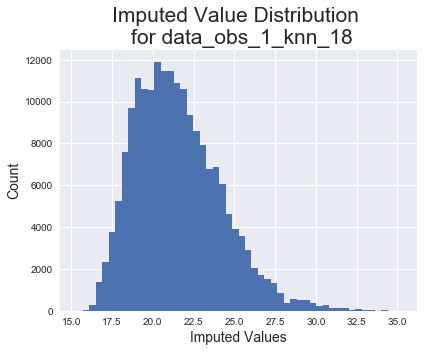

In [367]:
# Save and Visualize Fancy Impute Results
def save_impute_result(data_dict):
    import os
    imputation_result_dir = '../data/fancy_impute_result/'
    if not os.path.isdir(imputation_result_dir):
        os.mkdir(imputation_result_dir)

    imputed_dict = {k:v for (k,v) in data_dict.items() if '.txt' not in k}
    for res_name, result in imputed_dict.items():
        print("Saving {}".format(res_name))
        result[ground_truth.columns].to_csv(
                  os.path.join('../data/fancy_impute_result/', 
                               '{}.csv'.format(res_name)
                              )
                  , index=False
                 )

import re
imputed_dict = OrderedDict({k:v for (k,v) in data_dict.items() if '.txt' not in k})
# Different between ground truth and imputed
imputed_keys = list(imputed_dicts.keys())
random_idx = random.choice(range(len(imputed_dict.keys())))
random_key = imputed_keys[random_idx]
random_df = imputed_dict[random_key]
sample_idx = re.match("^data_obs_(\d+)_(.*)", random_key).group(1)

obs_test = sample_dict['data_obs_{}.txt'.format(sample_idx)][ground_truth.columns]
impute_test = imputed_dict[random_key][ground_truth.columns]

ft = 14
fig, ax = plt.subplots(figsize=(6.4, 4.8))
plt.hist(
    impute_test[sample_cols].as_matrix()[np.isnan(obs_test[sample_cols].as_matrix())],  
    bins=50
)
ax.set_xlabel('Imputed Values', fontsize=ft)
ax.set_ylabel('Count', fontsize=ft)
ax.set_title('Imputed Value Distribution \n for {}'.format(random_key), fontsize=round(1.5*ft))

<a id="2modegmm"></a>
# Two-component BayesianGaussianMixture
back to the [table of contents](#tableofcontents)

In [421]:
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
import itertools
n_components = 2
color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])
gmm = GaussianMixture(n_components=n_components, covariance_type='full',
                              max_iter=100)
dpgmm = BayesianGaussianMixture(
    n_components=n_components, covariance_type='full', weight_concentration_prior=1e-2,
    weight_concentration_prior_type='dirichlet_process',
    mean_precision_prior=1e-2, covariance_prior=1e0 * np.eye(ground_truth_mat.T.shape[1]),
    init_params="random", max_iter=100, random_state=2)

gmm_ground_truth = GaussianMixture(
    n_components=n_components, 
    covariance_type='full', 
    max_iter=100
).fit(ground_truth_mat.T)

dpgmm_ground_truth = BayesianGaussianMixture(
    n_components=n_components, covariance_type='full', 
    weight_concentration_prior=1e-2,
    weight_concentration_prior_type='dirichlet_process',
    mean_precision_prior=1e-2, covariance_prior=1e0 * np.eye(ground_truth_mat.T.shape[1]),
    init_params="random", max_iter=100, random_state=2
).fit(ground_truth_mat.T)

normed_gmm_ground_truth = GaussianMixture(
    n_components=n_components, 
    covariance_type='full', 
    max_iter=100
).fit(ground_truth_normalized.T)

normed_dpgmm_ground_truth = BayesianGaussianMixture(
    n_components=n_components, covariance_type='full', 
    weight_concentration_prior=1e-2,
    weight_concentration_prior_type='dirichlet_process',
    mean_precision_prior=1e-2, covariance_prior=1e0 * np.eye(ground_truth_mat.T.shape[1]),
    init_params="random", max_iter=100, random_state=42
).fit(ground_truth_normalized.T)

KeyboardInterrupt: 

In [414]:
# two component GMM for all genes
gmm_pred = gmm_ground_truth.predict(ground_truth_mat.T)
# predict_proba(ground_truth_mat)
dpgmm_pred = dpgmm_ground_truth.predict(ground_truth_mat.T)
# predict_proba(ground_truth_mat)
normed_gmm_pred = normed_dpgmm_ground_truth.predict(ground_truth_normalized.T)
normed_dpgmm_pred = normed_dpgmm_ground_truth.predict(ground_truth_normalized.T)

# two component by gene

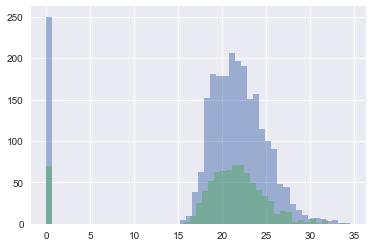

In [419]:
# % pylab inline
# import seaborn as sns
# import matplotlib.pyplot as plt
# plt.hist(gmm_pred[:, 0], bins=50)
# plt.hist(gmm_pred[:, 1], bins=50)
# ground_truth['Sample_1']
ground_truth['Sample_30'].loc[np.where(normed_dpgmm_pred==0)].hist(bins=50, alpha=0.5)
ground_truth['Sample_30'].loc[np.where(normed_dpgmm_pred==1)].hist(bins=50, alpha=0.5)
# ground_truth['Sample_1'].loc[np.where(normed_dpgmm_pred==2)].hist(bins=50, alpha=0.5)

In [276]:
ground_truth.columns

Index(['Gene_ID', 'Sample_1', 'Sample_2', 'Sample_3', 'Sample_4', 'Sample_5',
       'Sample_6', 'Sample_7', 'Sample_8', 'Sample_9', 'Sample_10',
       'Sample_11', 'Sample_12', 'Sample_13', 'Sample_14', 'Sample_15',
       'Sample_16', 'Sample_17', 'Sample_18', 'Sample_19', 'Sample_20',
       'Sample_21', 'Sample_22', 'Sample_23', 'Sample_24', 'Sample_25',
       'Sample_26', 'Sample_27', 'Sample_28', 'Sample_29', 'Sample_30',
       'Sample_31', 'Sample_32', 'Sample_33', 'Sample_34', 'Sample_35',
       'Sample_36', 'Sample_37', 'Sample_38', 'Sample_39', 'Sample_40',
       'Sample_41', 'Sample_42', 'Sample_43', 'Sample_44', 'Sample_45',
       'Sample_46', 'Sample_47', 'Sample_48', 'Sample_49', 'Sample_50',
       'Sample_51', 'Sample_52', 'Sample_53', 'Sample_54', 'Sample_55',
       'Sample_56', 'Sample_57', 'Sample_58', 'Sample_59', 'Sample_60',
       'Sample_61', 'Sample_62', 'Sample_63', 'Sample_64', 'Sample_65',
       'Sample_66', 'Sample_67', 'Sample_68', 'Sample_69', 'Sa